In [8]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
sy.init_printing() 

# <font face="gotham" color="purple"> Linear Transformation </font>

There are many new terminologies in this chapter, however they are not entirely new to us.

Let $V$ and $W$ be vector spaces. The mapping $T:\ V\rightarrow W$ is called a _linear transformation_ if an only if

$$
T(u+v)=T(u)+T(v)\quad \text{and} \quad T(cu)=cT(u)
$$

for all $u,v\in V$ and all $c\in R$. If $T:\ V\rightarrow W$, then $T$ is called a _linear operator_. For each $u\in V$, the vector $w=T(u)$ is called the _image_ of $u$ under $T$.

## <font face="gotham" color="purple"> Parametric Function Plotting </font>

We need one tool for illustrating linear transformation.

We want to plot any line in vector space by an equation:  $p = p_0+tv $. We need to know vector $p_0$ and $v$ to plot the line. 

For instance, $p_0 = (2, 6)$, $v=(5, 3)$ and $p = (x, y)$, subsitute them into our equation
$$
\left[
\begin{matrix}
x\\y
\end{matrix}
\right]=\left[
\begin{matrix}
2\\6
\end{matrix}
\right]+
t\left[
\begin{matrix}
5\\3
\end{matrix}
\right]
$$

We will create a plot to illustrate the linear transformation later.

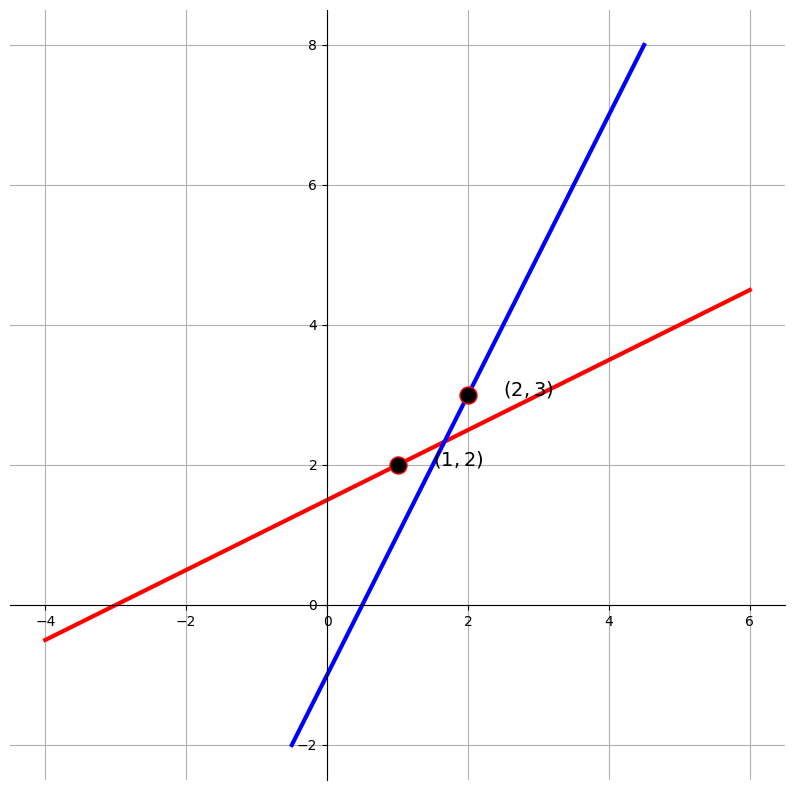

In [15]:


def paraEqPlot(p0, v0, p1, v1):
    t = np.linspace(-5, 5)
    
    ################### First Line ####################
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot first line
    x = p0[0, 0] + v0[0, 0] * t
    y = p0[1, 0] + v0[1, 0] * t
    ax.plot(x, y, lw=3, color='red')
    ax.grid(True)
    ax.scatter(p0[0, 0], p0[1, 0], s=150, edgecolor='red', facecolor='black', zorder=3)
    
    # Plot second line
    x = p1[0, 0] + v1[0, 0] * t
    y = p1[1, 0] + v1[1, 0] * t
    ax.plot(x, y, lw=3, color='blue')
    ax.grid(True)
    ax.scatter(p1[0, 0], p1[1, 0], s=150, edgecolor='red', facecolor='black', zorder=3)
    
    # Set the position of the spines
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    # Add text annotations
    string = f'$({int(p0[0, 0])}, {int(p0[1, 0])})$'
    ax.text(x=p0[0, 0] + 0.5, y=p0[1, 0], s=string, size=14)
    
    string = f'$({int(p1[0, 0])}, {int(p1[1, 0])})$'
    ax.text(x=p1[0, 0] + 0.5, y=p1[1, 0], s=string, size=14)
    
    plt.show()

# Example usage
p0 = np.array([[1], [2]])
v0 = np.array([[1], [0.5]])
p1 = np.array([[2], [3]])
v1 = np.array([[0.5], [1]])

paraEqPlot(p0, v0, p1, v1)


## <font face="gotham" color="purple"> A Simple Linear Transformation </font>

Now we know the parametric functions in $\mathbb{R}^2$, we can show how a linear transformation acturally works on a line.

Let's say, we perform linear transformation on a vector $(x, y)$, 

$$
T\left(\begin{bmatrix} x \\ y \end{bmatrix}\right) = \begin{pmatrix} 3x - 2y \\ -2x + 3y \end{pmatrix}
$$
and substitute the parametric function into the linear operator.


$$
T\left(\begin{bmatrix} 4+t \\ 5+3t \end{bmatrix}\right) = \begin{pmatrix} 3(4+t) - 2(5+3t) \\ -2(4+t) + 3(5+3t) \end{pmatrix} = \begin{bmatrix} 2 - 3t \\ 7 + 7t \end{bmatrix}
$$

The red line is transformed into blue line and point $(4, 5)$ transformed into $(2, 7)$

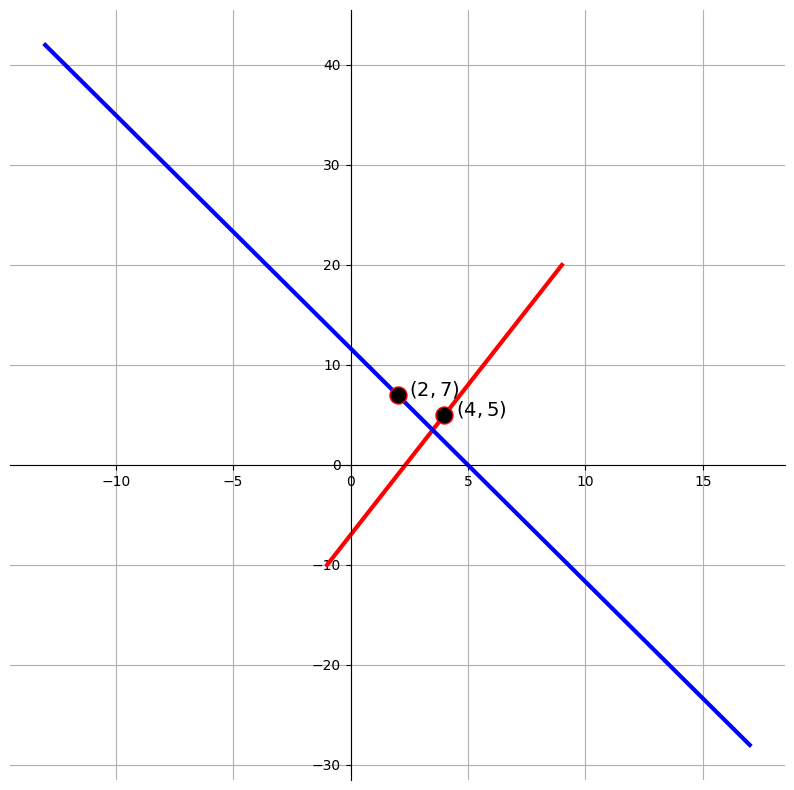

In [16]:
p0 = np.array([[4],[5]])
v0 = np.array([[1],[3]])
p1 = np.array([[2],[7]])
v1 = np.array([[-3],[7]])
paraEqPlot(p0,v0,p1, v1)

## <font face="gotham" color="purple"> Visualization of Change of Basis </font>

Change of basis is also a kind of linear transformation. Let's create a grid.

In [11]:
u1, u2 = np.linspace(-5, 5, 10), np.linspace(-5, 5, 10)
U1, U2 = np.meshgrid(u1, u2)

We plot each row of $U2$ again each row of $U1$

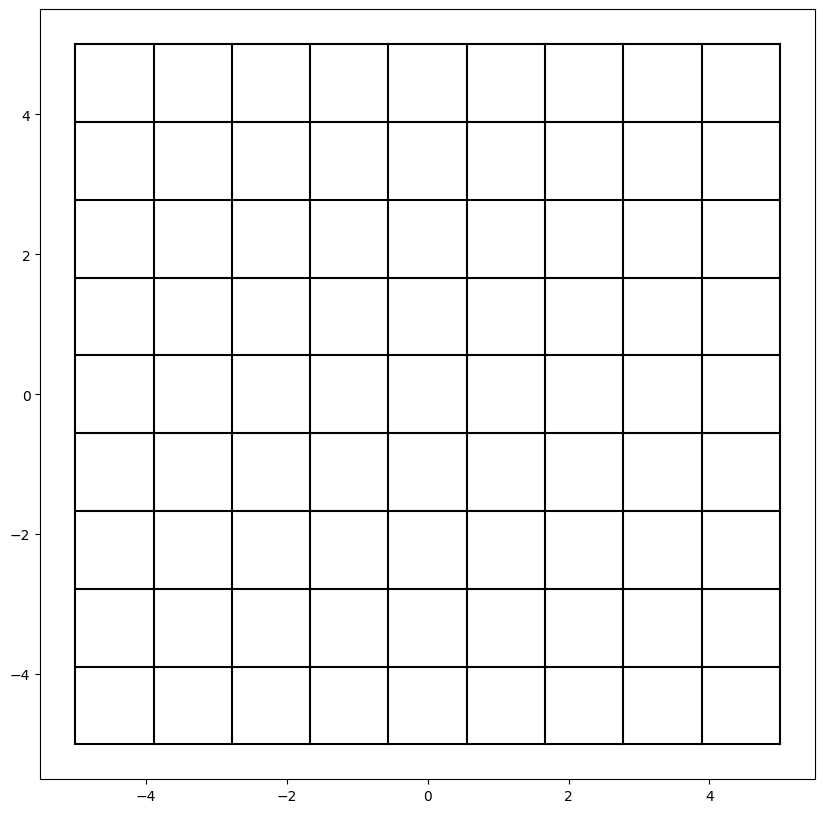

In [12]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(U1,U2, color = 'black') 
ax.plot(U1.T,U2.T, color = 'black') 
plt.show()

Let $A$ and $B$ be two bases in $\mathbb{R}^3$
 
$$
A = \left\{ \begin{bmatrix} 2 \\ 1 \end{bmatrix}, \ \begin{bmatrix} 1 \\ 1 \end{bmatrix} \right\} \\
B = \left\{ \begin{bmatrix} 3 \\ 2 \end{bmatrix}, \ \begin{bmatrix} 0 \\ -1 \end{bmatrix} \right\}
$$

If we want to use basis $A$ to represent $B$, we can construct an augmented matrix like we did before.

$$
[A|B]=
\left[
\begin{matrix}
2 & 1 & 3 & 0\\
1 & 1 & 2 & -1
\end{matrix}
\right]
$$

In [13]:
AB = sy.Matrix([[2,1,3,0],[1,1,2,-1]]); AB.rref()

⎛⎡1  0  1  1 ⎤        ⎞
⎜⎢           ⎥, (0, 1)⎟
⎝⎣0  1  1  -2⎦        ⎠

We find the transition matrix $P_{A\leftarrow B}$
$$
[A|B]=[I|P_{A\leftarrow B}]
$$

We can write

$$
\big[x\big]_A = P_{A\leftarrow B}\big[u\big]_B\\
\left[
\begin{matrix}
x_1\\x_2
\end{matrix}
\right]
=
\left[
\begin{matrix}
1 & 1\\1 & -2
\end{matrix}
\right]
\left[
\begin{matrix}
u_1\\u_2
\end{matrix}
\right]\\
$$

Therefore
$$
x_1 = u_1+u_2\\
x_2 = u_1 - 2u_2
$$

Let's plot original and transformed coordinates together.

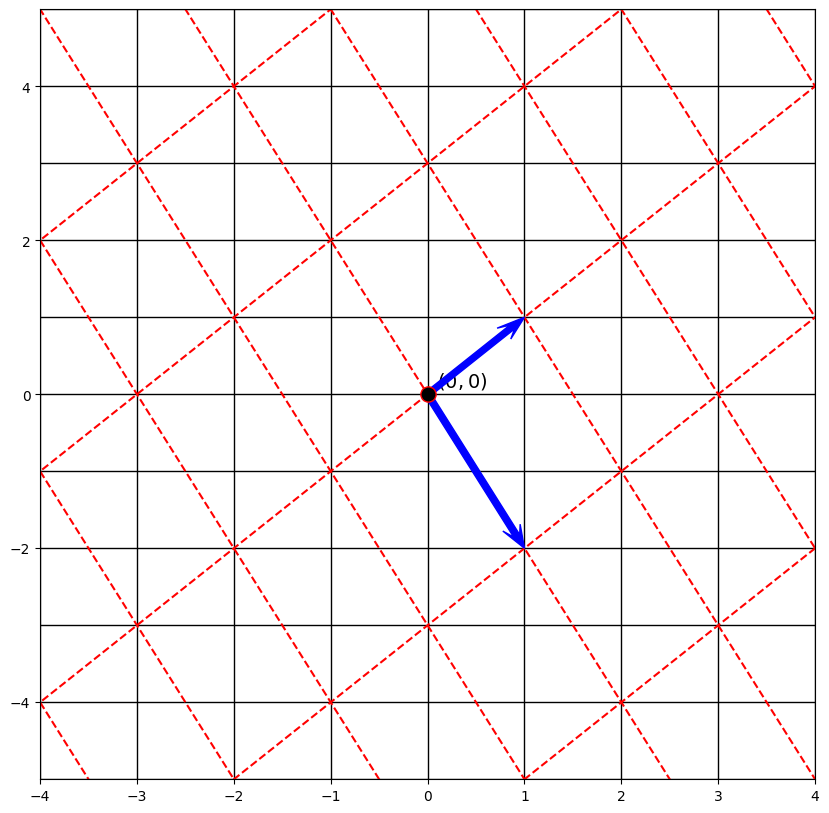

In [14]:
u1, u2 = np.linspace(-10, 10, 21), np.linspace(-10, 10, 21)
U1, U2 = np.meshgrid(u1, u2)

fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(U1,U2, color = 'black', lw = 1) 
ax.plot(U1.T,U2.T, color = 'black', lw = 1) 

X1 = U1 +U2
X2 = U1 - 2*U2
ax.plot(X1,X2, color = 'red', ls = '--') 
ax.plot(X1.T,X2.T, color = 'red', ls = '--') 

ax.arrow(0, 0, 1, 1, color = 'blue', width = .07, 
     length_includes_head = True,
     head_width = .2, # default: 3*width
     head_length = .3, zorder = 4,
     overhang = .4)

ax.arrow(0, 0, 1, -2, color = 'blue', width = .07, 
     length_includes_head = True,
     head_width = .2, # default: 3*width
     head_length = .3,zorder = 4,
     overhang = .4)

ax.text(0.1,0.1,'$(0, 0)$',size = 14)
ax.scatter(0,0,s = 120, zorder = 5, ec = 'red', fc = 'black')

ax.axis([-4, 4, -5, 5])
plt.show()